<a href="https://colab.research.google.com/github/KagontleBooysen/transfer_learning_assignment/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage import measure, morphology
from sklearn.cluster import KMeans
from skimage.transform import resize
# import importlib
# importlib.import_module('mpl_toolkits.mplot3d').__path__
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import os

%matplotlib inline

from google.colab import drive

# Mount Google Drive7

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/test.zip'  # Update the path accordingly

# Specify the directory where you want to extract the contents
extracted_path = '/content/drive/MyDrive/newtest'  # Update the path accordingly

# Unzip the file
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/meta_train.csv')
print(df.head())

  ImageInstanceUID  width  height
0     d8ba599611e5   2836    2336
1     29b23a11d1e4   4256    3488
2     47d014f9055a   2992    2991
3     8125a7add80b   4256    3488
4     32a47637d8f2   4240    3480


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/meta_test.csv')
print(df.head())

  ImageInstanceUID  width  height
0     8d6dea06a032   3344    2422
1     695e2c6dede4   2500    2048
2     9850b5470fd6   2382    2330
3     9f6cc74b0062   2832    2320
4     a29c5a68b07b   2828    2320


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/meta_train.csv')
print(df.tail())

     ImageInstanceUID  width  height
6329     6a00337d651e   2904    2894
6330     d7d3e4f7c2a1   3056    2544
6331     01e604f3bb53   3050    2539
6332     5e2314581f5d   3052    3052
6333     19688420ee92   2992    2801


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/meta_test.csv')
print(df.tail())

     ImageInstanceUID  width  height
1258     817301ec71da   2880    2540
1259     14658311d76e   3052    3052
1260     69ffab5539ec   4248    3480
1261     b168e230f3f5   2880    2540
1262     a522fd19d916   3050    2539


Displaying images from folder: test


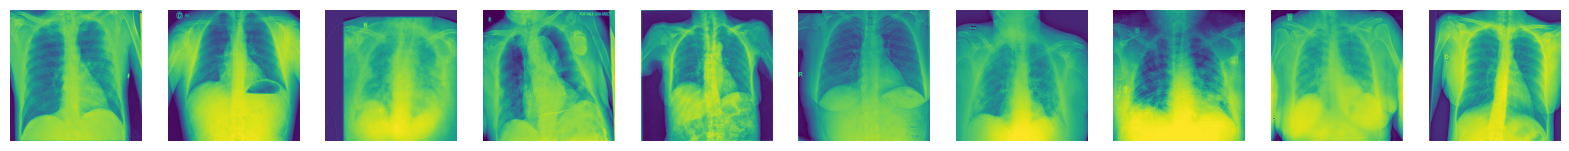

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the folders of images
root_directory = '/content/drive/MyDrive/images/'

# Function to load and display images from a folder
def display_images_in_folder(folder_path, num_images=5):
    images = os.listdir(folder_path)
    num_cols = min(num_images, len(images))
    num_rows = (len(images) - 1) // num_cols + 1
    plt.figure(figsize=(20, 5 * num_rows))
    for i, image_name in enumerate(images[:num_images]):
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path)
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# List all folders in the root directory
folders = [f for f in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, f))]

# Display images from each folder
for folder in folders:
    folder_path = os.path.join(root_directory, folder)
    print(f"Displaying images from folder: {folder}")
    display_images_in_folder(folder_path, num_images=10)  # Increase the number of images displayed per row


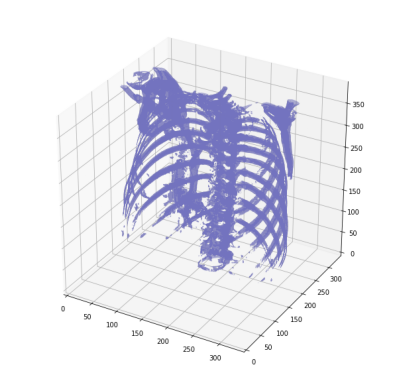

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the PNG image
image_path = "/content/drive/MyDrive/images/3d.png"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Disable axis
plt.show()


In [ ]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 5

# Load pre-trained models
vgg_base = VGG16(input_shape=(*IMAGE_SIZE, 3), weights='imagenet', include_top=False)
resnet_base = ResNet50(input_shape=(*IMAGE_SIZE, 3), weights='imagenet', include_top=False)
inception_base = InceptionV3(input_shape=(*IMAGE_SIZE, 3), weights='imagenet', include_top=False)

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False
for layer in resnet_base.layers:
    layer.trainable = False
for layer in inception_base.layers:
    layer.trainable = False


In [ ]:
# Add custom fully connected layers for VGG16
vgg_flatten = Flatten()(vgg_base.output)
vgg_fc = Dense(256, activation='relu')(vgg_flatten)
vgg_output = Dense(NUM_CLASSES, activation='softmax')(vgg_fc)
vgg_model = Model(inputs=vgg_base.input, outputs=vgg_output)

In [ ]:
# Add custom fully connected layers for ResNet50
resnet_flatten = Flatten()(resnet_base.output)
resnet_fc = Dense(256, activation='relu')(resnet_flatten)
resnet_output = Dense(NUM_CLASSES, activation='softmax')(resnet_fc)
resnet_model = Model(inputs=resnet_base.input, outputs=resnet_output)

In [ ]:
# Add custom fully connected layers for InceptionV3
inception_flatten = Flatten()(inception_base.output)
inception_fc = Dense(256, activation='relu')(inception_flatten)
inception_output = Dense(NUM_CLASSES, activation='softmax')(inception_fc)
inception_model = Model(inputs=inception_base.input, outputs=inception_output)

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess_input)

In [ ]:
# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/train",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/newtest",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

Found 5130 images belonging to 1 classes.
Found 1263 images belonging to 1 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

base_model = VGG19(input_shape = (128,128,3),
                     include_top = False,
                     weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
flat = Flatten()(x)


class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.inputs, output)
model_01.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

filepath = "model.h5"
es = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=4)
cp = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, save_weights_only=False, mode="auto", save_freq="epoch")
lrr = ReduceLROnPlateau(monitor="val_accuracy", patience=3, verbose=1, factor=0.5, min_lr=0.0001)

sgd = SGD(learning_rate=0.0001, momentum=0, nesterov=True)

model_01.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [51]:
history_01 = model_01.fit(train_generator,
            steps_per_epoch=50,
            epochs=1,
            callbacks=[es, cp, lrr],
            validation_data=train_generator)

50/50 [==============================] - ETA: 0s - loss: 1.4366 - accuracy: 0.6212

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 1657s 32s/step - loss: 1.4366 - accuracy: 0.6212 - val_loss: 1.3977 - val_accuracy: 0.5733 - lr: 1.0000e-04


In [52]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_01.save(filepath = "model_weights/vgg19_model_01.h5", overwrite=True)

In [ ]:
model_01.load_weights("model_weights/vgg19_model_01.h5")

vgg_val_eval_01 = model_01.evaluate(train_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

40/40 [==============================] - 292s 7s/step - loss: 6.4726 - accuracy: 0.3333


In [ ]:
print(f"Validation Loss: {vgg_val_eval_01[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_01[1]}")
print(f"Test Loss: {vgg_test_eval_01[0]}")
print(f"Test Accuarcy: {vgg_test_eval_01[1]}"
)

Validation Loss: 1.3945778608322144
Validation Accuarcy: 0.6424951553344727
Test Loss: 6.472632884979248
Test Accuarcy: 0.3333333432674408


# Increamental unfreezing & fine tuning

In [ ]:
base_model = VGG19(include_top=False, input_shape=(128,128,3))
base_model_layer_names = [layer.name for layer in base_model.layers]

x = base_model.output
flat = Flatten()(x)


class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights("model_weights/vgg19_model_01.h5")

set_trainable = False
for layer in base_model.layers:
    if layer.name in [ 'block5_conv3','block5_conv4']:
        set_trainable=True
    if set_trainable:
        set_trainable=True
    else:
        set_trainable=False
print(model_02.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
base_model_layer_names

['input_6',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [ ]:
import tensorflow as tf

initial_learning_rate = 0.0001
decay_rate = 0.96
decay_steps = 10000

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=True
)

sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate_schedule, momentum=0.0, nesterov=True)

model_02.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [ ]:
history_02 = model_02.fit(train_generator,
            steps_per_epoch=10,
            epochs=1,
            callbacks=[es, cp, lrr],
            validation_data=train_generator)

10/10 [==============================] - 1443s 156s/step - loss: 1.4311 - accuracy: 0.4719 - val_loss: 1.3949 - val_accuracy: 0.4828 - lr: 1.0000e-04


In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_02.save(filepath = "model_weights/vgg19_model_02.h5", overwrite=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_02.load_weights("model_weights/vgg19_model_02.h5")

vgg_val_eval_02 = model_02.evaluate(train_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

print(f"Validation Loss: {vgg_val_eval_02[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_02[1]}")
print(f"Test Loss: {vgg_test_eval_02[0]}")
print(f"Test Accuarcy: {vgg_test_eval_02[1]}")

40/40 [==============================] - 306s 8s/step - loss: 6.7844 - accuracy: 0.3080
Validation Loss: 1.3942943811416626
Validation Accuarcy: 0.5019493103027344
Test Loss: 6.784432411193848
Test Accuarcy: 0.30799683928489685


# Unfreezing and fine tuning the entire network

In [ ]:
import tensorflow as tf

initial_learning_rate = 0.0001
decay_rate = 0.96
decay_steps = 10000

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=True
)

sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate_schedule, momentum=0.0, nesterov=True)

model_03.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [ ]:
history_03 = model_02.fit(train_generator,
            steps_per_epoch=100,
            epochs=1,
            callbacks=[es, cp, lrr],
            validation_data=train_generator)

100/100 [==============================] - 3747s 38s/step - loss: nan - accuracy: 0.8053 - val_loss: nan - val_accuracy: 1.0000 - lr: 1.0000e-04


In [ ]:
# Generate predictions for test data
vgg_y_pred = vgg_model.predict(test_generator)
resnet_y_pred = resnet_model.predict(test_generator)
inception_y_pred = inception_model.predict(test_generator)

In [ ]:
# Extract true labels from the generator
vgg_y_true = test_generator.classes
resnet_y_true = test_generator.classes
inception_y_true = test_generator.classes